In [1]:
from scale.utils import read_labels

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Leukemia


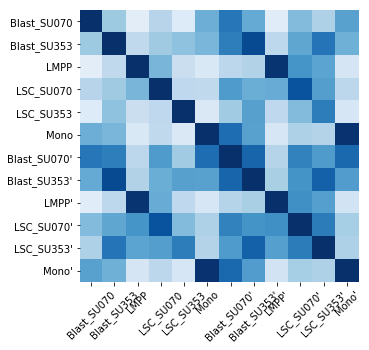

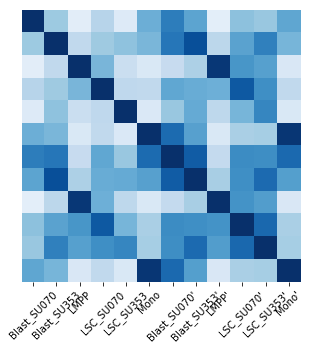

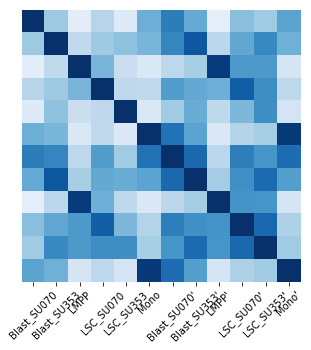

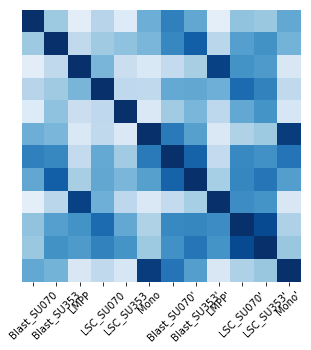

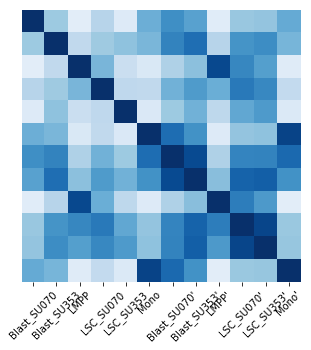

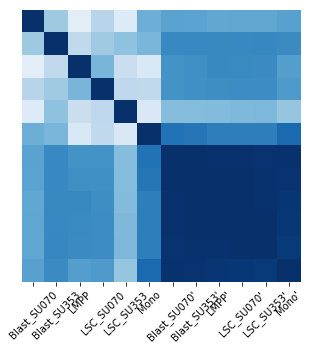

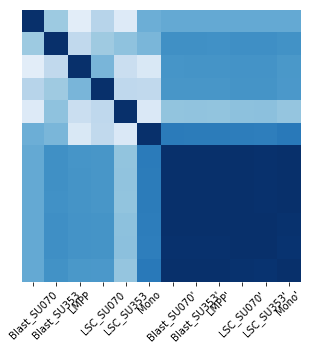

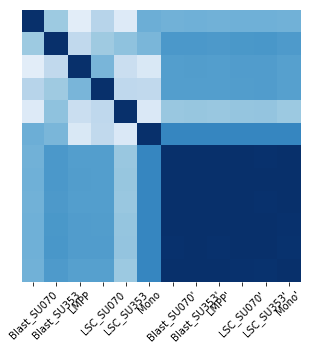

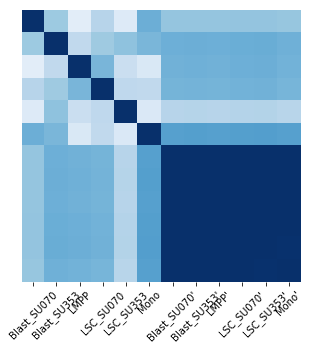

GM12878vsHEK


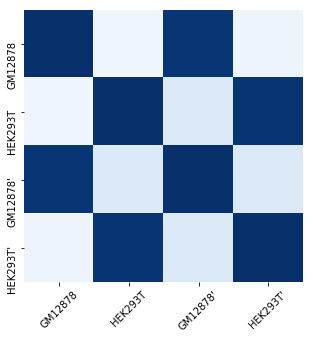

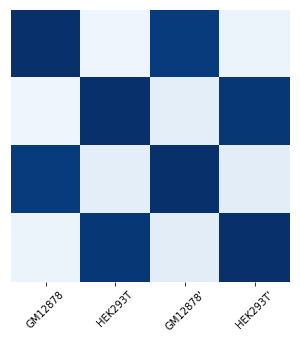

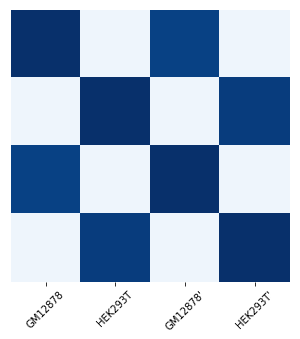

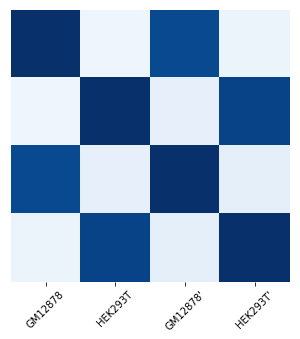

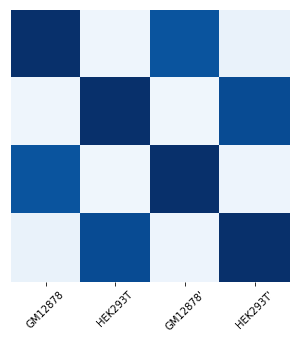

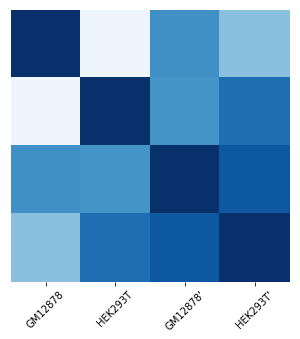

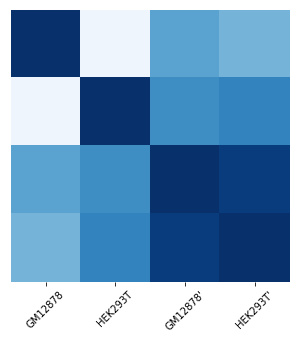

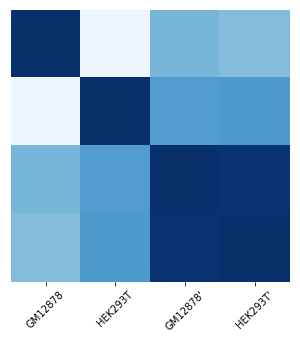

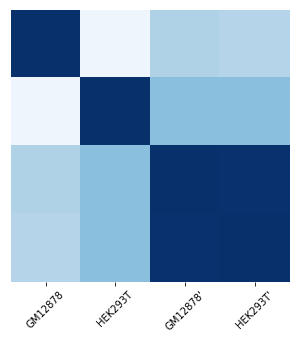

GM12878vsHL


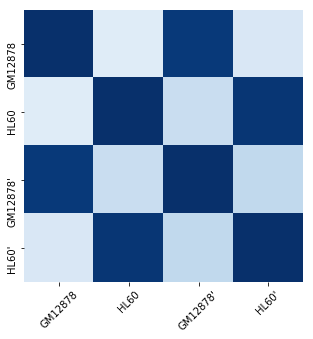

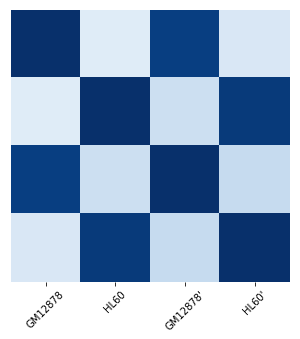

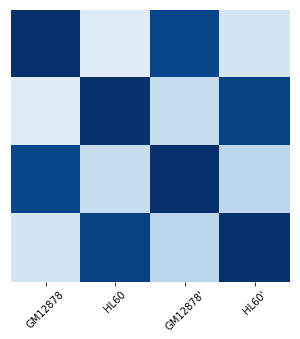

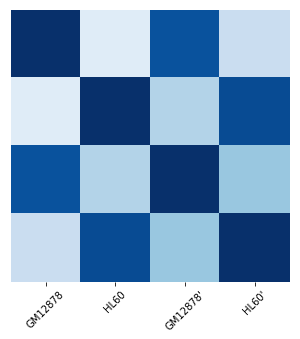

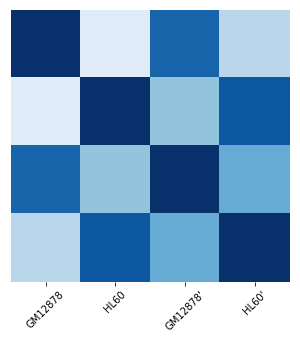

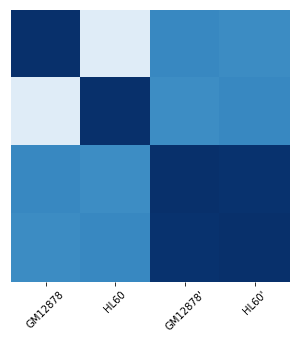

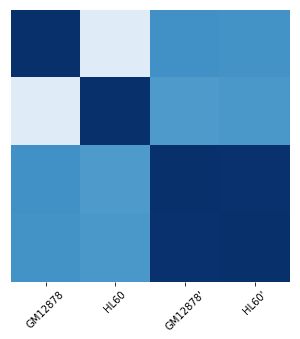

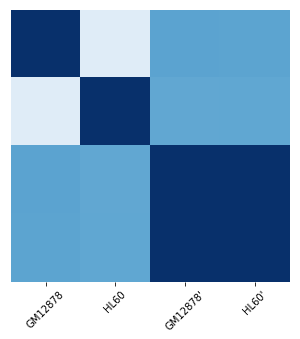

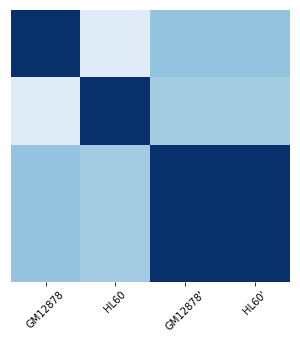

InSilico


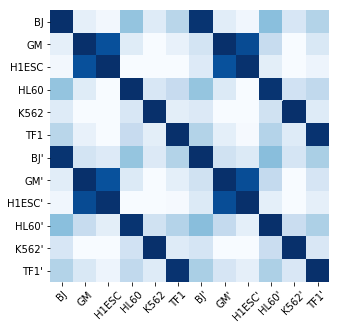

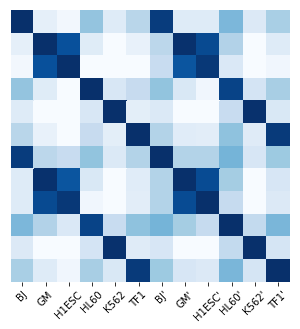

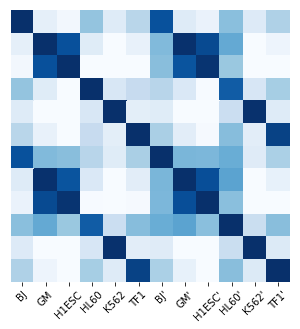

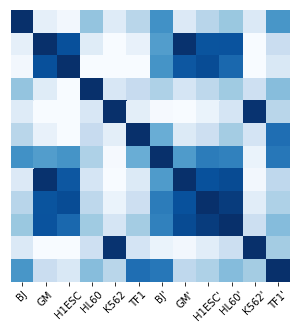

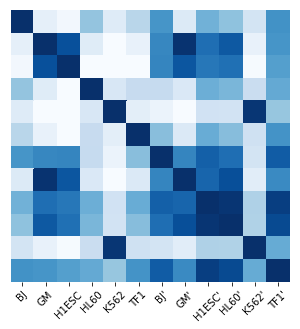

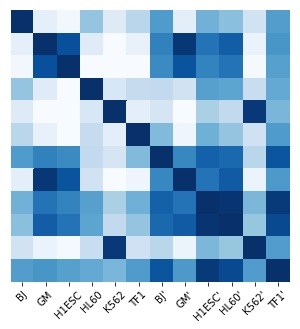

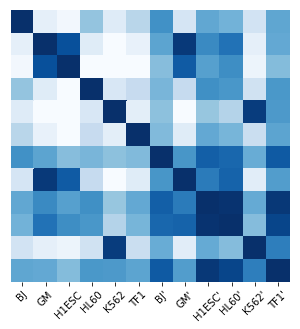

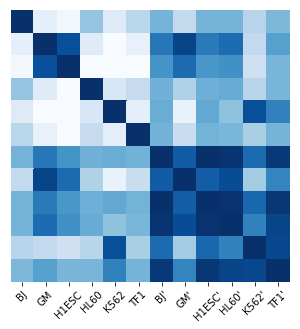

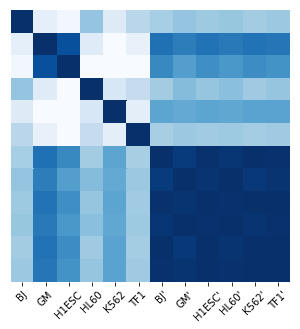

Splenocyte


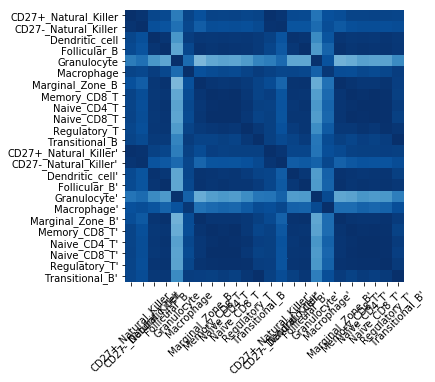

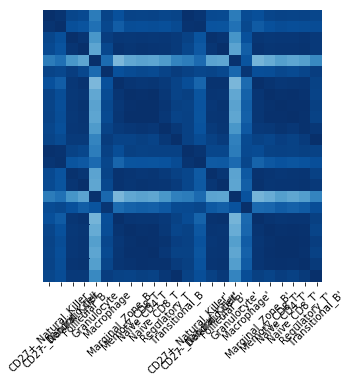

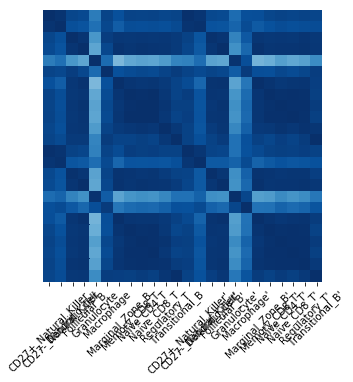

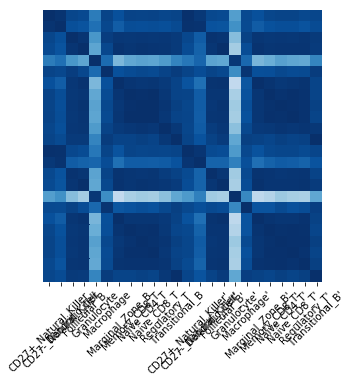

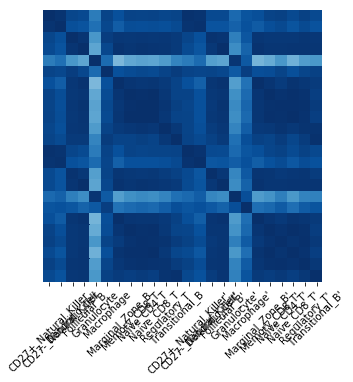

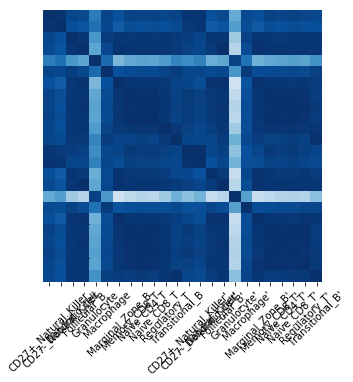

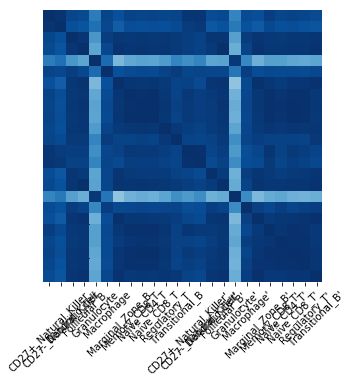

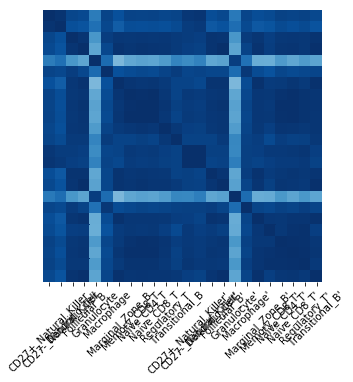

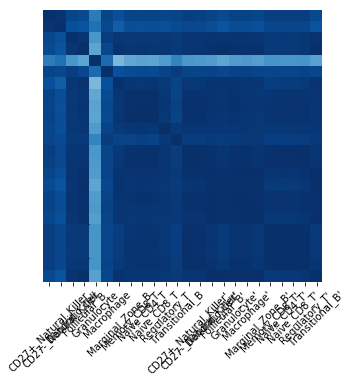

Forebrain


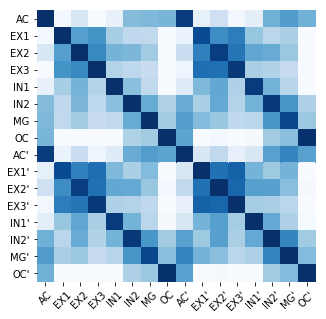

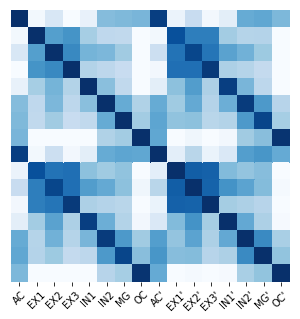

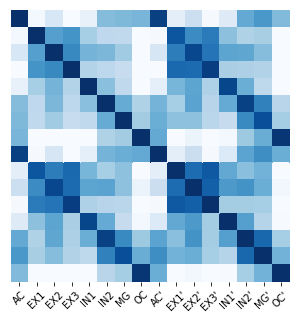

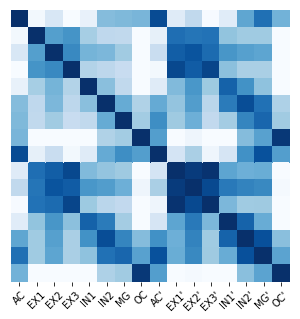

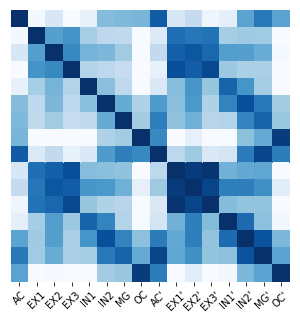

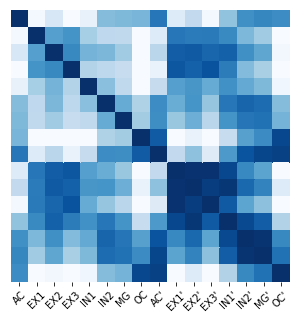

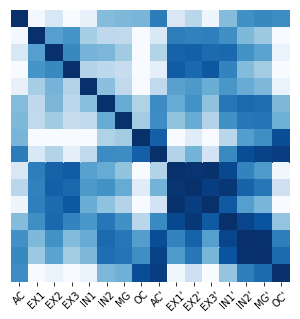

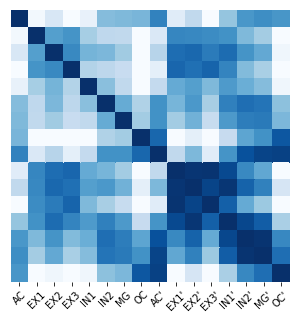

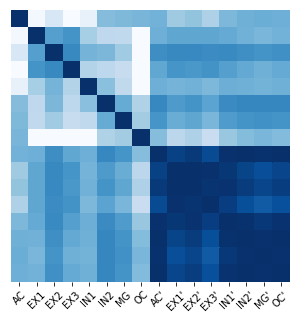

In [2]:
score_inter = []
score_intra = []
datasets = ['Leukemia', 'GM12878vsHEK', 'GM12878vsHL', 'InSilico', 'Splenocyte', 'Forebrain']
for dataset in ['Leukemia', 'GM12878vsHEK', 'GM12878vsHL', 'InSilico', 'Splenocyte', 'Forebrain']:
    filename = 'corrupt_result/{}/corrupt_{}/imputed_data.txt'
    raw_file = 'data/{}/data.txt'.format(dataset)
    label_file = 'data/{}/labels.txt'.format(dataset)
    raw = pd.read_csv(raw_file, sep='\t', index_col=0); print(dataset)
    y = pd.read_csv(label_file, sep='\t', index_col=0, header=None)
    if dataset in ["GM12878vsHEK", 'GM12878vsHL']:
        classes = np.unique(y)[:2]
    else:
        classes = np.unique(y)
    raw_meta = []
    scale_meta = []

    for c in classes:
        index = np.where(y==c)[0]
        raw_meta.append(raw.iloc[:, index].mean(axis=1))
    raw_meta = pd.DataFrame(raw_meta)

    score1 = []
    score2 = []
    yticklabels = True
    fraction = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for i, frac in enumerate(fraction):
        data = pd.read_csv(filename.format(dataset, frac), sep='\t', index_col=0)
        meta = []
        for c in classes:
            index = np.where(y==c)[0]
            meta.append(data.iloc[:, index].mean(axis=1))
        meta = pd.DataFrame(meta)

        classes_ = [ c+"'" for c in classes]
        ticklabels = np.concatenate([classes, classes_])

        corr = np.corrcoef(raw_meta, meta)
        plt.figure(figsize=(5,5))
        if yticklabels:
            yticklabels = ticklabels
        g = sns.heatmap(corr, cmap='Blues', 
                    xticklabels=ticklabels, yticklabels=yticklabels, vmin=0.3, vmax=1, cbar=False)
        g.set_xticklabels(ticklabels, rotation=45)
        plt.show()
        corr1 = corr[:len(classes), len(classes):]
        score1.append(np.mean(list(np.triu(corr1, k=1).flatten()) + list((1-np.diagonal(corr1)).flatten())))
        
        corr2 = corr[len(classes):, len(classes):]
        score2.append(np.mean(list(np.triu(corr2, k=1).flatten()) + list((1-np.diagonal(corr2)).flatten())))

        yticklabels=False
    score_intra.append(score1)
    score_inter.append(score2)

Text(0.5, 1.0, 'inter')

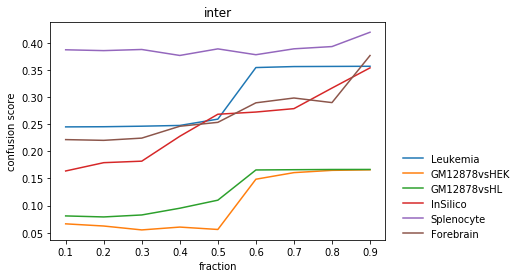

In [3]:
datasets = ['Leukemia', 'GM12878vsHEK', 'GM12878vsHL', 'InSilico', 'Splenocyte', 'Forebrain']
pd.DataFrame(score_inter, index=datasets).T.plot(kind='line')
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.2), frameon=False)
plt.xlabel('fraction')
plt.ylabel('confusion score')
plt.xticks(ticks=range(0,9), labels=fraction)
plt.title('inter')

Text(0.5, 1.0, 'intra')

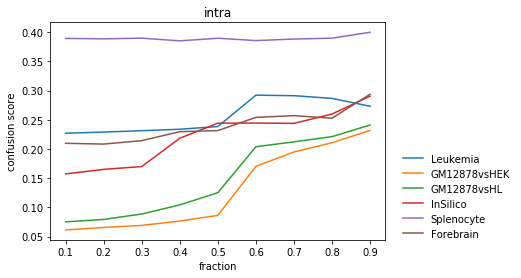

In [4]:
datasets = ['Leukemia', 'GM12878vsHEK', 'GM12878vsHL', 'InSilico', 'Splenocyte', 'Forebrain']
pd.DataFrame(score_intra, index=datasets).T.plot(kind='line')
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.2), frameon=False)
plt.xticks(ticks=range(0,9), labels=fraction)
plt.xlabel('fraction')
plt.ylabel('confusion score')
plt.title('intra')